# 2. 気象データ(時間変化する2次元場)の描画

## 2.1 海面水温(SST)についての背景知識

## 2.2 ファイルの入力と変数の中身の確認

### 2.2.1 モジュールのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

### 2.2.2 海面水温の.npzファイルをダウンロードする

### 2.2.3 海面水温ファイルを入力する

In [2]:
load_file = 'input/Kohyama2024_DataLink_20240325/sst_OISST.npz'
sst_dataset = np.load(load_file)

In [3]:
sst_dataset.files

['sst', 'lon2', 'lat2', 'y', 'm']

In [4]:
# 海面水温(Sea Surface Temperture)
sst = sst_dataset['sst']
# 経度(Longitude)
lon2 = sst_dataset['lon2']
# 緯度(Latitude)
lat2 = sst_dataset['lat2']

y = sst_dataset['y']
m = sst_dataset['m']

### 2.2.4 変数一覧の確認

In [5]:
whos

Variable      Type       Data/Info
----------------------------------
Normalize     type       <class 'matplotlib.colors.Normalize'>
lat2          ndarray    360x180: 64800 elems, type `float64`, 518400 bytes (506.25 kb)
load_file     str        input/Kohyama2024_DataLink_20240325/sst_OISST.npz
lon2          ndarray    360x180: 64800 elems, type `float64`, 518400 bytes (506.25 kb)
m             ndarray    456: 456 elems, type `float64`, 3648 bytes
np            module     <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt           module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sst           ndarray    360x180x456: 29548800 elems, type `float64`, 236390400 bytes (225.439453125 Mb)
sst_dataset   NpzFile    NpzFile 'input/Kohyama202<...>ys: sst, lon2, lat2, y, m
y             ndarray    456: 456 elems, type `float64`, 3648 bytes


## 2.3 変数の中身の確認

### 2.3.1 緯度と経度

In [6]:
lon2

array([[  0.5,   0.5,   0.5, ...,   0.5,   0.5,   0.5],
       [  1.5,   1.5,   1.5, ...,   1.5,   1.5,   1.5],
       [  2.5,   2.5,   2.5, ...,   2.5,   2.5,   2.5],
       ...,
       [357.5, 357.5, 357.5, ..., 357.5, 357.5, 357.5],
       [358.5, 358.5, 358.5, ..., 358.5, 358.5, 358.5],
       [359.5, 359.5, 359.5, ..., 359.5, 359.5, 359.5]])

In [7]:
lat2

array([[ 89.5,  88.5,  87.5, ..., -87.5, -88.5, -89.5],
       [ 89.5,  88.5,  87.5, ..., -87.5, -88.5, -89.5],
       [ 89.5,  88.5,  87.5, ..., -87.5, -88.5, -89.5],
       ...,
       [ 89.5,  88.5,  87.5, ..., -87.5, -88.5, -89.5],
       [ 89.5,  88.5,  87.5, ..., -87.5, -88.5, -89.5],
       [ 89.5,  88.5,  87.5, ..., -87.5, -88.5, -89.5]])

### 2.3.2 年と月

In [8]:
y

array([1982., 1982., 1982., 1982., 1982., 1982., 1982., 1982., 1982.,
       1982., 1982., 1982., 1983., 1983., 1983., 1983., 1983., 1983.,
       1983., 1983., 1983., 1983., 1983., 1983., 1984., 1984., 1984.,
       1984., 1984., 1984., 1984., 1984., 1984., 1984., 1984., 1984.,
       1985., 1985., 1985., 1985., 1985., 1985., 1985., 1985., 1985.,
       1985., 1985., 1985., 1986., 1986., 1986., 1986., 1986., 1986.,
       1986., 1986., 1986., 1986., 1986., 1986., 1987., 1987., 1987.,
       1987., 1987., 1987., 1987., 1987., 1987., 1987., 1987., 1987.,
       1988., 1988., 1988., 1988., 1988., 1988., 1988., 1988., 1988.,
       1988., 1988., 1988., 1989., 1989., 1989., 1989., 1989., 1989.,
       1989., 1989., 1989., 1989., 1989., 1989., 1990., 1990., 1990.,
       1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990., 1990.,
       1991., 1991., 1991., 1991., 1991., 1991., 1991., 1991., 1991.,
       1991., 1991., 1991., 1992., 1992., 1992., 1992., 1992., 1992.,
       1992., 1992.,

In [9]:
m

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,
        4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,
        5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,
        7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,
        9., 10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.,
       10., 11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,
       11., 12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1

### 2.3.3 海面水温(SST)

In [10]:
sst

array([[[-1.78999996, -1.78999996, -1.78999996, ..., -1.78999996,
         -1.78999996, -1.78999996],
        [-1.78999996, -1.78999996, -1.78999996, ..., -1.78999996,
         -1.78999996, -1.78999996],
        [-1.77999997, -1.78999996, -1.78999996, ..., -1.77999997,
         -1.78999996, -1.78999996],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-1.78999996, -1.78999996, -1.78999996, ..., -1.78999996,
         -1.78999996, -1.78999996],
        [-1.78999996, -1.78999996, -1.78999996, ..., -1.78999996,
         -1.78999996, -1.78999996],
        [-1.77999997, -1.78999996, -1.78999996, ..., -1.77999997,
         -1.78999996, -1.78999996],
        ...,
        [        nan,         nan,         nan, ...,  

In [11]:
sst[:, :, 0]  # 1982年1月、3次元目の一番目のデータ

array([[-1.78999996, -1.78999996, -1.77999997, ...,         nan,
                nan,         nan],
       [-1.78999996, -1.78999996, -1.77999997, ...,         nan,
                nan,         nan],
       [-1.78999996, -1.78999996, -1.77999997, ...,         nan,
                nan,         nan],
       ...,
       [-1.78999996, -1.78999996, -1.78999996, ...,         nan,
                nan,         nan],
       [-1.78999996, -1.78999996, -1.78999996, ...,         nan,
                nan,         nan],
       [-1.78999996, -1.78999996, -1.78999996, ...,         nan,
                nan,         nan]])

In [12]:
sst[:, :, 0].shape

(360, 180)

## 2.4 ある月の海面水温を描画してみる

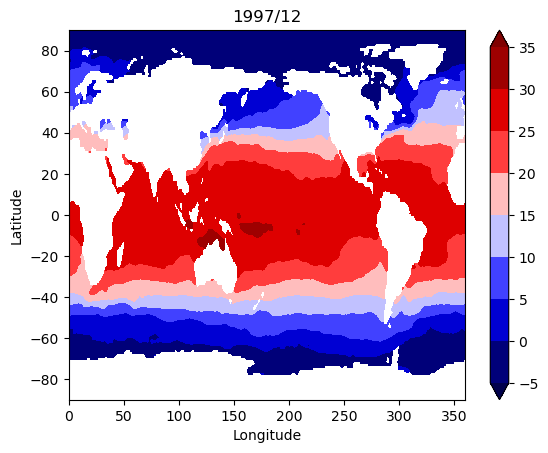

In [13]:
draw_year = 1997
draw_month = 12

# vminは対象値(この場合はSST)の下限、vmax対象値の上限、vintは対象値の間隔
vmin = -5
vmax = 35
vint = 5

# 深い青から深い赤に向かうカラーバーを指定
cm = plt.get_cmap('seismic')

# 色で塗られた等高線を描く
# np.squeezeは、360×180×1の配列を360×180として認識させるための関数
cs = plt.contourf(
    lon2,
    lat2,
    np.squeeze(sst[:, :, (y==draw_year)*(m==draw_month)]),
    cmap=cm,
    norm=Normalize(vmin=vmin,vmax=vmax),
    levels=np.arange(vmin, vmax+vint, vint), extend='both'
)

plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(0, 360)
plt.ylim(-90, 90)

title = str(draw_year) + '/' + str(draw_month)
plt.title(title)

plt.show();

## 2.5 章末問題

### A問題
#### A-1.

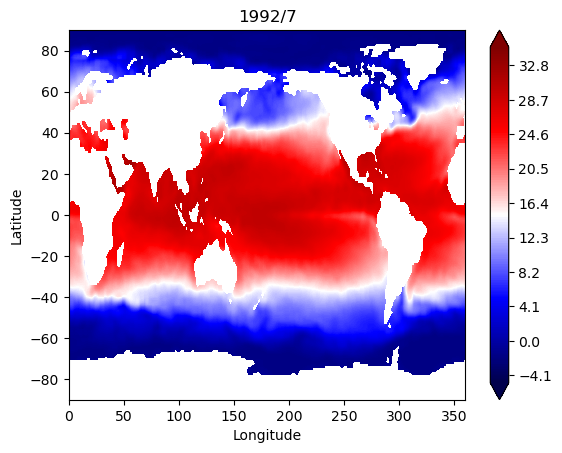

In [14]:
draw_year = 1992
draw_month = 7

# vminは対象値(この場合はSST)の下限、vmax対象値の上限、vintは対象値の間隔
vmin = -5
vmax = 35
vint = 0.1

# 深い青から深い赤に向かうカラーバーを指定
cm = plt.get_cmap('seismic')

# 色で塗られた等高線を描く
# np.squeezeは、360×180×1の配列を360×180として認識させるための関数
cs = plt.contourf(
    lon2,
    lat2,
    np.squeeze(sst[:, :, (y==draw_year)*(m==draw_month)]),
    cmap=cm,
    norm=Normalize(vmin=vmin,vmax=vmax),
    levels=np.arange(vmin, vmax+vint, vint), extend='both'
)

plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(0, 360)
plt.ylim(-90, 90)

title = str(draw_year) + '/' + str(draw_month)
plt.title(title)

plt.show();

#### A-2.

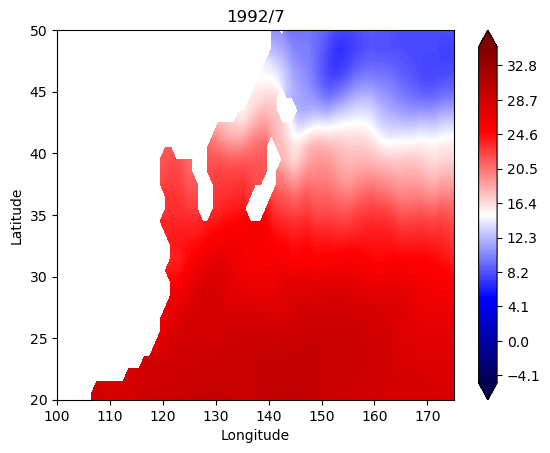

In [15]:
draw_year = 1992
draw_month = 7

# vminは対象値(この場合はSST)の下限、vmax対象値の上限、vintは対象値の間隔
vmin = -5
vmax = 35
vint = 0.1

# 深い青から深い赤に向かうカラーバーを指定
cm = plt.get_cmap('seismic')

# 色で塗られた等高線を描く
# np.squeezeは、360×180×1の配列を360×180として認識させるための関数
cs = plt.contourf(
    lon2,
    lat2,
    np.squeeze(sst[:, :, (y==draw_year)*(m==draw_month)]),
    cmap=cm,
    norm=Normalize(vmin=vmin,vmax=vmax),
    levels=np.arange(vmin, vmax+vint, vint), extend='both'
)

plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(100, 175)
plt.ylim(20, 50)

title = str(draw_year) + '/' + str(draw_month)
plt.title(title)

plt.show();

#### A-3.

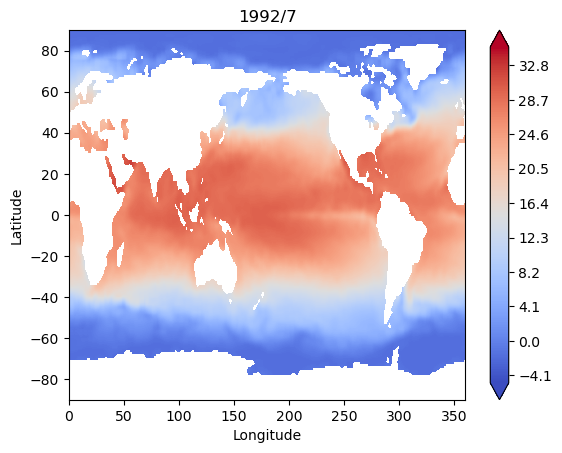

In [16]:
draw_year = 1992
draw_month = 7

# vminは対象値(この場合はSST)の下限、vmax対象値の上限、vintは対象値の間隔
vmin = -5
vmax = 35
vint = 0.1

# 深い青から深い赤に向かうカラーバーを指定
cm = plt.get_cmap('coolwarm')

# 色で塗られた等高線を描く
# np.squeezeは、360×180×1の配列を360×180として認識させるための関数
cs = plt.contourf(
    lon2,
    lat2,
    np.squeeze(sst[:, :, (y==draw_year)*(m==draw_month)]),
    cmap=cm,
    norm=Normalize(vmin=vmin,vmax=vmax),
    levels=np.arange(vmin, vmax+vint, vint), extend='both'
)

plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(0, 360)
plt.ylim(-90, 90)

title = str(draw_year) + '/' + str(draw_month)
plt.title(title)

plt.show();

### B問題

 #### B-1.

In [17]:
A = np.array([[1, 2, 4],[4, 3, 5], [6, 2, 9]])
B = np.array([5, 5, 4])

In [18]:
B==5

array([ True,  True, False])

In [19]:
A==4

array([[False, False,  True],
       [ True, False, False],
       [False, False, False]])

In [20]:
A[:, B==4]

array([[4],
       [5],
       [9]])

行列Aは3列×3行の正方行列、行列Bは3列×1行の行列である。
ここで...
* **B==4** は行列Bの各成分の値に対して、**4**であるかどうかの判別を行った結果
* **A[:, B==4]** は行列Aに対して、**B==4**の結果であるarray([False,  False, True])から、**3列目のみ**を抽出する。
* **sst** は

したがって **sst[:, :, (y==draw_year) \* (m==draw_month)]** は

### C問題

In [21]:
load_file = 'input/Kohyama2024_DataLink_20240325/msm_20191012.npz'
pressure_dataset = np.load(load_file)

In [22]:
pressure_dataset.files

['surface_pressure',
 'temperature',
 'humidity',
 'cloud',
 'rain1h',
 'lon2',
 'lat2',
 'y',
 'm',
 'd',
 'h']

In [23]:
surface_pressure = pressure_dataset['surface_pressure']
surface_pressure_hpa = pressure_dataset['surface_pressure'] / 100
temperature = pressure_dataset['temperature']
humidity = pressure_dataset['humidity']
cloud = pressure_dataset['cloud']
rain1h = pressure_dataset['rain1h']
lon2 = pressure_dataset['lon2']
lat2 = pressure_dataset['lat2']
y = pressure_dataset['y']
m = pressure_dataset['m']
d = pressure_dataset['d']
h = pressure_dataset['h']

In [24]:
surface_pressure[:, :, 0]

array([[ 89004.58699048,  88942.20167052,  89154.12827213, ...,
        101279.81612268, 101279.81612268, 101279.81612268],
       [ 88704.58699599,  88716.51360128,  89091.74295218, ...,
        101266.97208622, 101266.97208622, 101266.97208622],
       [ 88666.97231778,  88754.12827948,  89166.97230859, ...,
        101266.97208622, 101266.97208622, 101266.97208622],
       ...,
       [101629.35740066, 101629.35740066, 101642.20143712, ...,
        101279.81612268, 101279.81612268, 101279.81612268],
       [101629.35740066, 101629.35740066, 101642.20143712, ...,
        101279.81612268, 101279.81612268, 101279.81612268],
       [101629.35740066, 101629.35740066, 101642.20143712, ...,
        101279.81612268, 101279.81612268, 101279.81612268]])

In [25]:
surface_pressure_hpa[:, :, 0]

array([[ 890.0458699 ,  889.42201671,  891.54128272, ..., 1012.79816123,
        1012.79816123, 1012.79816123],
       [ 887.04586996,  887.16513601,  890.91742952, ..., 1012.66972086,
        1012.66972086, 1012.66972086],
       [ 886.66972318,  887.54128279,  891.66972309, ..., 1012.66972086,
        1012.66972086, 1012.66972086],
       ...,
       [1016.29357401, 1016.29357401, 1016.42201437, ..., 1012.79816123,
        1012.79816123, 1012.79816123],
       [1016.29357401, 1016.29357401, 1016.42201437, ..., 1012.79816123,
        1012.79816123, 1012.79816123],
       [1016.29357401, 1016.29357401, 1016.42201437, ..., 1012.79816123,
        1012.79816123, 1012.79816123]])

##### Surface Pressure / 地表面気圧

In [26]:
print(f'surface_pressure_hpa shape: {surface_pressure_hpa.shape}')
print(f'max surface_pressure_hpa: {np.max(surface_pressure_hpa)}')
print(f'min surface_pressure_hpa: {np.min(surface_pressure_hpa)}')

surface_pressure_hpa shape: (481, 505, 24)
max surface_pressure_hpa: 1027.541280221916
min surface_pressure_hpa: 733.229359025276


##### Temperture / 地表気温

In [38]:
print(f'temperature shape: {temperature.shape}')
print(f'max temperature: {np.max(temperature-273.15)}')
print(f'min temperature: {np.min(temperature-273.15)}')

temperature shape: (481, 505, 24)
max temperature: 31.250847264871027
min temperature: -14.328442384888945


##### Humidity / 湿度

In [28]:
print(f'humidity shape: {humidity.shape}')
print(f'max humidity: {np.max(humidity)}')
print(f'min humidity: {np.min(humidity)}')

humidity shape: (481, 505, 24)
max humidity: 100.004586080466
min humidity: 14.685782410748999


##### Cloud / 雲量

In [29]:
print(f'cloud shape: {cloud.shape}')
print(f'max cloud: {np.max(cloud)}')
print(f'min cloud: {np.min(cloud)}')

cloud shape: (481, 505, 24)
max cloud: 99.99999773
min cloud: 2.2699999959741035e-06


##### Rain1h / 1時間降水量

In [30]:
print(f'rain1h shape: {rain1h.shape}')
print(f'max rain1h: {np.max(rain1h)}')
print(f'min rain1h: {np.min(rain1h)}')

rain1h shape: (481, 505, 24)
max rain1h: 200.0
min rain1h: -6.668500020623469e-06


In [31]:
y

array([2019., 2019., 2019., 2019., 2019., 2019., 2019., 2019., 2019.,
       2019., 2019., 2019., 2019., 2019., 2019., 2019., 2019., 2019.,
       2019., 2019., 2019., 2019., 2019., 2019.])

In [32]:
m

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [33]:
d

array([12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.])

In [34]:
h

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

##### 描画 地上気圧

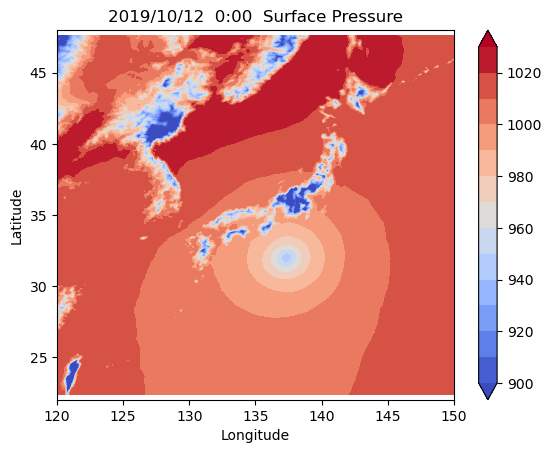

In [42]:
draw_year = 2019
draw_month = 10
draw_day = 12
draw_hour = 0

# vminは対象値(この場合はsurface_pressure)の下限、vmax対象値の上限、vintは対象値の間隔
vmin = 900#*100
vmax = 1028#*100
vint = 10

# 深い青から深い赤に向かうカラーバーを指定
cm = plt.get_cmap('coolwarm')

# 色で塗られた等高線を描く
# np.squeezeは、360×180×1の配列を360×180として認識させるための関数
cs = plt.contourf(
    lon2,
    lat2,
    np.squeeze(surface_pressure_hpa[:, :, (y==draw_year)*(m==draw_month)*(d==draw_day)*(h==draw_hour)]),
    cmap=cm,
    norm=Normalize(vmin=vmin,vmax=vmax),
    levels=np.arange(vmin, vmax+vint, vint), extend='both'
)

plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(120, 150)
plt.ylim(22, 48)

title = str(draw_year) + '/' + str(draw_month) + '/' + str(draw_day) + '  ' + str(draw_hour) + ':00' + '  ' + 'Surface Pressure'
plt.title(title)

plt.show();

##### 描画 地表面温度

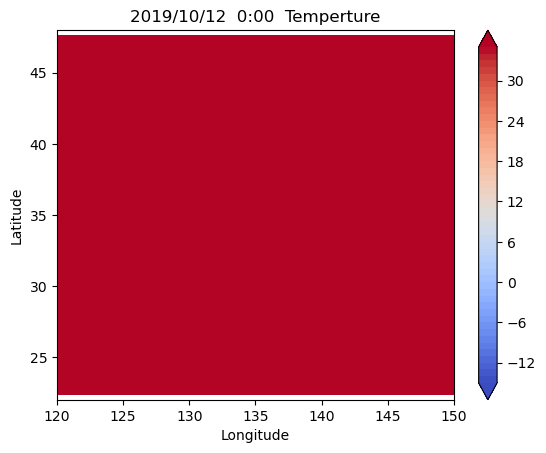

In [41]:
# parameter
variable = temperature
draw_year = 2019
draw_month = 10
draw_day = 12
draw_hour = 0

# vminは対象値(この場合はsurface_pressure)の下限、vmax対象値の上限、vintは対象値の間隔
vmin = -15
vmax = 35
vint = 1

# 深い青から深い赤に向かうカラーバーを指定
cm = plt.get_cmap('coolwarm')

# 色で塗られた等高線を描く
# np.squeezeは、360×180×1の配列を360×180として認識させるための関数
cs = plt.contourf(
    lon2,
    lat2,
    np.squeeze(variable[:, :, (y==draw_year)*(m==draw_month)*(d==draw_day)*(h==draw_hour)]),
    cmap=cm,
    norm=Normalize(vmin=vmin,vmax=vmax),
    levels=np.arange(vmin, vmax+vint, vint), extend='both'
)

plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(120, 150)
plt.ylim(22, 48)

title = str(draw_year) + '/' + str(draw_month) + '/' + str(draw_day) + '  ' + str(draw_hour) + ':00' + '  ' + 'Temperture'
plt.title(title)

plt.show();

##### 描画 湿度

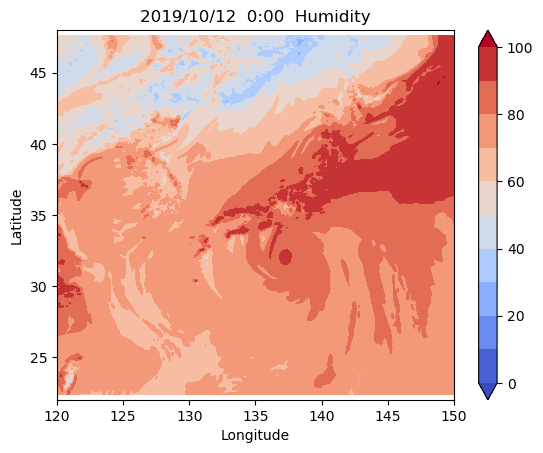

In [43]:
# parameter
variable = humidity
draw_year = 2019
draw_month = 10
draw_day = 12
draw_hour = 0

# vminは対象値(この場合はsurface_pressure)の下限、vmax対象値の上限、vintは対象値の間隔
vmin = 0
vmax = 100
vint = 10

# 深い青から深い赤に向かうカラーバーを指定
cm = plt.get_cmap('coolwarm')

# 色で塗られた等高線を描く
# np.squeezeは、360×180×1の配列を360×180として認識させるための関数
cs = plt.contourf(
    lon2,
    lat2,
    np.squeeze(variable[:, :, (y==draw_year)*(m==draw_month)*(d==draw_day)*(h==draw_hour)]),
    cmap=cm,
    norm=Normalize(vmin=vmin,vmax=vmax),
    levels=np.arange(vmin, vmax+vint, vint), extend='both'
)

plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(120, 150)
plt.ylim(22, 48)

title = str(draw_year) + '/' + str(draw_month) + '/' + str(draw_day) + '  ' + str(draw_hour) + ':00' + '  ' + 'Humidity'
plt.title(title)

plt.show();

##### 描画 雲量

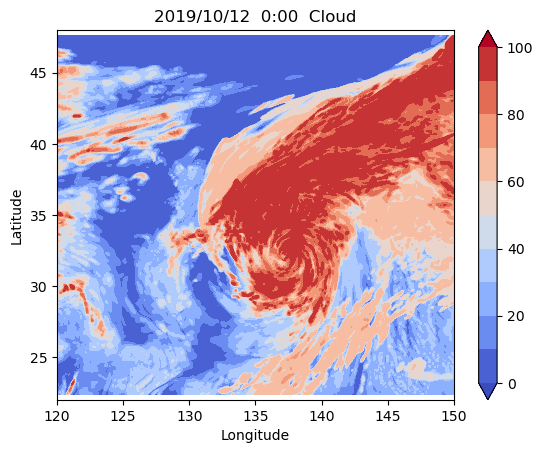

In [44]:
# parameter
variable = cloud
draw_year = 2019
draw_month = 10
draw_day = 12
draw_hour = 0

# vminは対象値(この場合はsurface_pressure)の下限、vmax対象値の上限、vintは対象値の間隔
vmin = 0
vmax = 100
vint = 10

# 深い青から深い赤に向かうカラーバーを指定
cm = plt.get_cmap('coolwarm')

# 色で塗られた等高線を描く
# np.squeezeは、360×180×1の配列を360×180として認識させるための関数
cs = plt.contourf(
    lon2,
    lat2,
    np.squeeze(variable[:, :, (y==draw_year)*(m==draw_month)*(d==draw_day)*(h==draw_hour)]),
    cmap=cm,
    norm=Normalize(vmin=vmin,vmax=vmax),
    levels=np.arange(vmin, vmax+vint, vint), extend='both'
)

plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(120, 150)
plt.ylim(22, 48)

title = str(draw_year) + '/' + str(draw_month) + '/' + str(draw_day) + '  ' + str(draw_hour) + ':00' + '  ' + 'Cloud'
plt.title(title)

plt.show();

##### 描画 1時間降水量

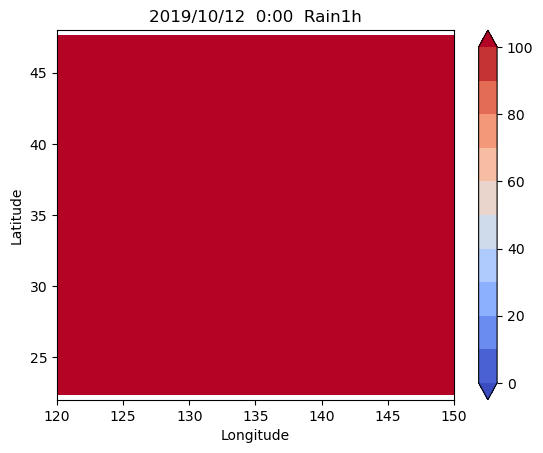

In [45]:
# parameter
variable = rain1h
draw_year = 2019
draw_month = 10
draw_day = 12
draw_hour = 0

# vminは対象値(この場合はsurface_pressure)の下限、vmax対象値の上限、vintは対象値の間隔
vmin = 0
vmax = 100
vint = 10

# 深い青から深い赤に向かうカラーバーを指定
cm = plt.get_cmap('coolwarm')

# 色で塗られた等高線を描く
# np.squeezeは、360×180×1の配列を360×180として認識させるための関数
cs = plt.contourf(
    lon2,
    lat2,
    np.squeeze(variable[:, :, (y==draw_year)*(m==draw_month)*(d==draw_day)*(h==draw_hour)]),
    cmap=cm,
    norm=Normalize(vmin=vmin,vmax=vmax),
    levels=np.arange(vmin, vmax+vint, vint), extend='both'
)

plt.colorbar(cs)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(120, 150)
plt.ylim(22, 48)

title = str(draw_year) + '/' + str(draw_month) + '/' + str(draw_day) + '  ' + str(draw_hour) + ':00' + '  ' + 'Rain1h'
plt.title(title)

plt.show();

### D問題

別ノートブックに作成（ex-B）